 <img src="header.png">

# Assignment 5

### deadline 1402/10/10

In [1]:
Student_name = "Ghadir Rahmaninia"
Student_ID = 40106324

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import logging
logging.getLogger('tensorflow').disabled = True

### Problem statement

Recalling the Assignment #2, in this assigment, student should build different machine learning models to predict the flutter speed of a composite wing in terms of its fiber angle.


### import utilities
The numpy and matplotlib libraries are imported.

In [2]:
import numpy as np
from matplotlib import pyplot as plt

### load data

In [3]:
x,y = np.loadtxt('flutter.csv', delimiter= ',',unpack=True, skiprows=1)

### Training set
The trainng set has been prepared as a subset of the loaded data contaminated with noises.

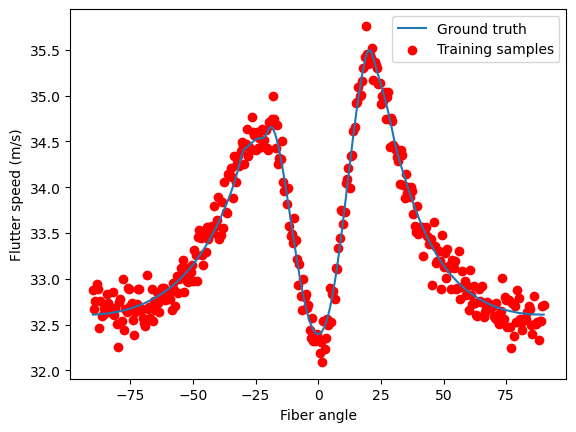

In [4]:
np.random.seed(0)
x_noise = x[::50]
y_noise = y[::50]+np.random.randn(len(x_noise))*0.15
plt.plot(x,y,label='Ground truth')
plt.scatter(x_noise, y_noise,label='Training samples', color ='r')
plt.xlabel('Fiber angle')
plt.ylabel('Flutter speed (m/s)')
plt.legend()

### Training, Validation, and Test Sets

The loaded dataset is splited into Training, Validation, and Test sets using `train_test_split` function of `sklrean` as:

In [5]:
from sklearn.model_selection import train_test_split
X_noise = x_noise.reshape(-1,1) 
X_train,X_temp,y_train,y_temp = train_test_split(X_noise,y_noise,test_size=0.4,random_state=42)
X_cv,X_test,y_cv,y_test = train_test_split(X_temp,y_temp,test_size=0.5,random_state=42)
print('Train size =', X_train.shape[0])
print('Validation size =', X_cv.shape[0])
print('Test size =', X_test.shape[0])

Train size = 216
Validation size = 72
Test size = 73


Using the provided sets, student should

- create different polynomial regressors, `degree` from 5 to 40, plot the **validation curve** (`J_train` and `J_cv` vs `degree`), and report the *generalization error* and plot **learning curve** (`J_train` and `J_cv` vs `m =` training size) for the best choice.
- create a regularized polynomial regressor (`degree = 50`, `Ridge`), plot the **validation curve** (`J_train` and `J_cv` vs $\alpha$), and report the *generalization error* and plot **learning curve** (`J_train` and `J_cv` vs `m =` training size) for the best choice. 
- create a three-layer regularized neural network (50 relu, 50 relu, 1 linear) using TensorFlow, plot the **validation curve** (`J_train` and `J_cv` vs $\alpha$), and report the *generalization error*  and plot **learning curve** (`J_train` and `J_cv` vs `m =` training size) for the best choice.

- propose their proposal for the prediction of the flutter speed.

**1_1)** create different polynomial regressors, `degree` from 5 to 40, plot the **validation curve** (`J_train` and `J_cv` vs `degree`)

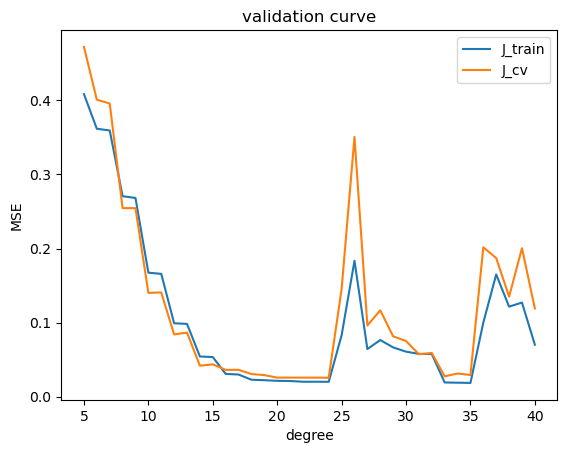

In [6]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error


degrees = np.arange(5,41)
J_train = np.zeros(degrees.size)
J_cv = np.zeros(degrees.size)

for i in range(degrees.size):
    model = make_pipeline(PolynomialFeatures(degree=degrees[i]), StandardScaler(),
                          LinearRegression()).fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    J_train[i] = mean_squared_error(y_train, y_train_pred)

    y_cv_pred = model.predict(X_cv)
    J_cv[i] = mean_squared_error(y_cv, y_cv_pred)

    
plt.plot(degrees, J_train, label='J_train')
plt.plot(degrees, J_cv, label='J_cv')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.title('validation curve')
plt.legend()
plt.show()

**1_2)** report the *generalization error*.

In [7]:
best_degree = 24

model = make_pipeline(PolynomialFeatures(degree=best_degree), StandardScaler(),
                      LinearRegression()).fit(X_train, y_train)

y_test_pred = model.predict(X_test)
generalization_error = mean_squared_error(y_test, y_test_pred)
print(f"generalization_error : {generalization_error:0.6f}")

generalization_error : 0.025999


**1_3**) plot **learning curve** (`J_train` and `J_cv` vs `m =` training size) for the best choice.

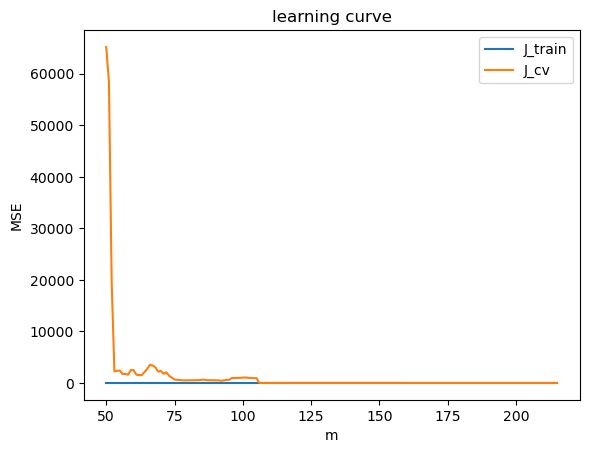

Max and Min J_train :  0.0200277   , 0.0112566
Max and Min J_cv    : 65207.52 , 0.0229918


In [8]:
best_degree = 24
list_m = np.arange(50, X_train.shape[0])
J_train = np.zeros(list_m.size)
J_cv = np.zeros(list_m.size)

for i in range(list_m.size):
    m = list_m[i]
    X_train_m = X_train[0:m , :]
    y_train_m = y_train[0:m]
    model = make_pipeline(PolynomialFeatures(degree=best_degree), StandardScaler(),
                          LinearRegression()).fit(X_train_m, y_train_m)
    y_train_m_pred = model.predict(X_train_m)
    J_train[i] = mean_squared_error(y_train_m, y_train_m_pred)

    y_cv_pred = model.predict(X_cv)
    J_cv[i] = mean_squared_error(y_cv, y_cv_pred)
    

plt.plot(list_m, J_train, label='J_train')
plt.plot(list_m, J_cv, label='J_cv')
plt.xlabel('m')
plt.ylabel('MSE')
plt.title('learning curve')
plt.legend()
plt.show()

print(f"Max and Min J_train :  {np.max(J_train):0.7f}   , {np.min(J_train):0.7f}")
print(f"Max and Min J_cv    : {np.max(J_cv):0.7g} , {np.min(J_cv):0.7f}")

**2_1)** create a regularized polynomial regressor (`degree = 50`, `Ridge`), plot the **validation curve** (`J_train` and `J_cv` vs $\alpha$).

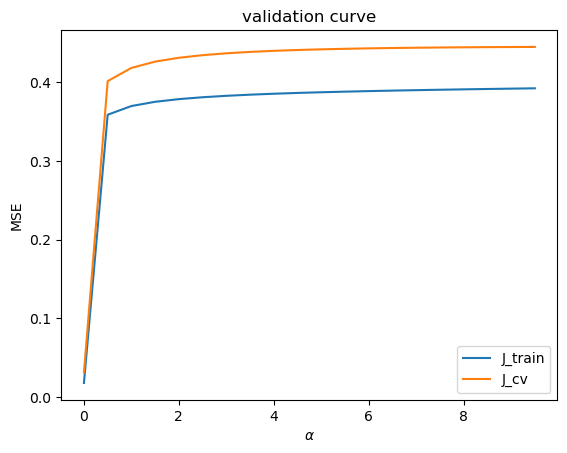

Max and Min J_train : 0.3920663 , 0.0180151
Max and Min J_cv    : 0.4446081 , 0.0315117


In [9]:
from sklearn.linear_model import Ridge 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

alpha_values = np.arange(0, 10, 0.5)
J_train = np.zeros(alpha_values.size)
J_cv = np.zeros(alpha_values.size)

for i in range(alpha_values.size):
    model = make_pipeline(PolynomialFeatures(degree=50), StandardScaler(),
                              Ridge(alpha=alpha_values[i])).fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    J_train[i] = mean_squared_error(y_train, y_train_pred)

    y_cv_pred = model.predict(X_cv)
    J_cv[i] = mean_squared_error(y_cv, y_cv_pred)


plt.plot(alpha_values, J_train, label='J_train')
plt.plot(alpha_values, J_cv, label='J_cv')
plt.xlabel('$ \\alpha $')
plt.ylabel('MSE')
plt.title('validation curve')
plt.legend()
plt.show()

print(f"Max and Min J_train : {np.max(J_train):0.7f} , {np.min(J_train):0.7f}")
print(f"Max and Min J_cv    : {np.max(J_cv):0.7f} , {np.min(J_cv):0.7f}")

**2_2)** report the *generalization error*.

In [10]:
best_alpha = 0.001

model = make_pipeline(PolynomialFeatures(degree=50), StandardScaler(),
                      Ridge(best_alpha)).fit(X_train, y_train)

y_test_pred = model.predict(X_test)
generalization_error = mean_squared_error(y_test, y_test_pred)
print(f"generalization_error : {generalization_error:0.6f}")

generalization_error : 0.186464


**2_3)** report the *generalization error* and plot **learning curve** (`J_train` and `J_cv` vs `m =` training size) for the best choice.

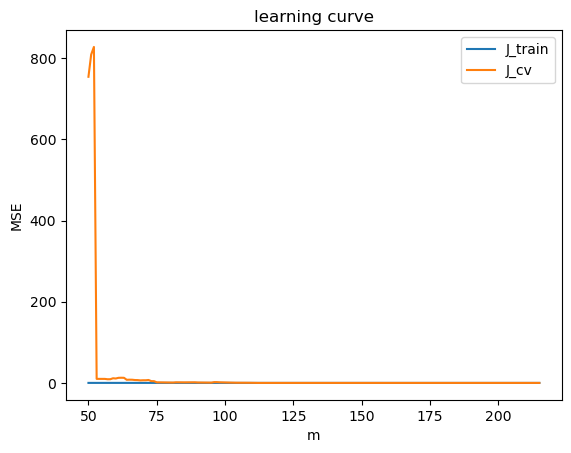

Max and Min J_train : 0.2450625 , 0.1805643
Max and Min J_cv    : 827.7175 , 0.1706618


In [11]:
best_alpha = 0.001

list_m = np.arange(50, X_train.shape[0])
J_train = np.zeros(list_m.size)
J_cv = np.zeros(list_m.size)

for i in range(list_m.size):
    m = list_m[i]
    X_train_m = X_train[0:m , :]
    y_train_m = y_train[0:m]
    estimator = make_pipeline(PolynomialFeatures(degree=50), StandardScaler(),
                              Ridge(alpha=best_alpha)).fit(X_train_m, y_train_m)
    
    y_train_m_pred = estimator.predict(X_train_m)
    J_train[i] = mean_squared_error(y_train_m, y_train_m_pred)

    y_cv_pred = estimator.predict(X_cv)
    J_cv[i] = mean_squared_error(y_cv, y_cv_pred)
    

plt.plot(list_m, J_train, label='J_train')
plt.plot(list_m, J_cv, label='J_cv')
plt.xlabel('m')
plt.ylabel('MSE')
plt.title('learning curve')
plt.legend()
plt.show()

print(f"Max and Min J_train : {np.max(J_train):0.7f} , {np.min(J_train):0.7f}")
print(f"Max and Min J_cv    : {np.max(J_cv):0.7g} , {np.min(J_cv):0.7f}")

**3_1)**create a three-layer regularized neural network (50 relu, 50 relu, 1 linear) using TensorFlow, plot the **validation curve** (`J_train` and `J_cv` vs $\alpha$)

X_train = (216, 1)  ,  y_train = (216, 1)  ,  X_cv = (72, 1)

X_train Max, Min pre normalization: 90.00, -90.00
X_train Max, Min post normalization: 1.74, -1.78

The data is repeated 500 times except for x_cv.
X_train = (108000, 1)  ,  y_train = (108000, 1)  ,  X_cv = (72, 1)

X_cv Max, Min pre normalization: 88.50, -88.50
X_cv Max, Min post normalization: 1.71, -1.76

---------------------------------------- lambda = 1e-05 ----------------------------------------

3/3 [==============================] - 0s 1ms/step

---------------------------------------- lambda = 0.0001 ----------------------------------------

3/3 [==============================] - 0s 1ms/step

---------------------------------------- lambda = 0.001 ----------------------------------------

3/3 [==============================] - 0s 1ms/step

---------------------------------------- lambda = 0.01 ----------------------------------------

3/3 [==============================] - 0s 1ms/step

----------------------------

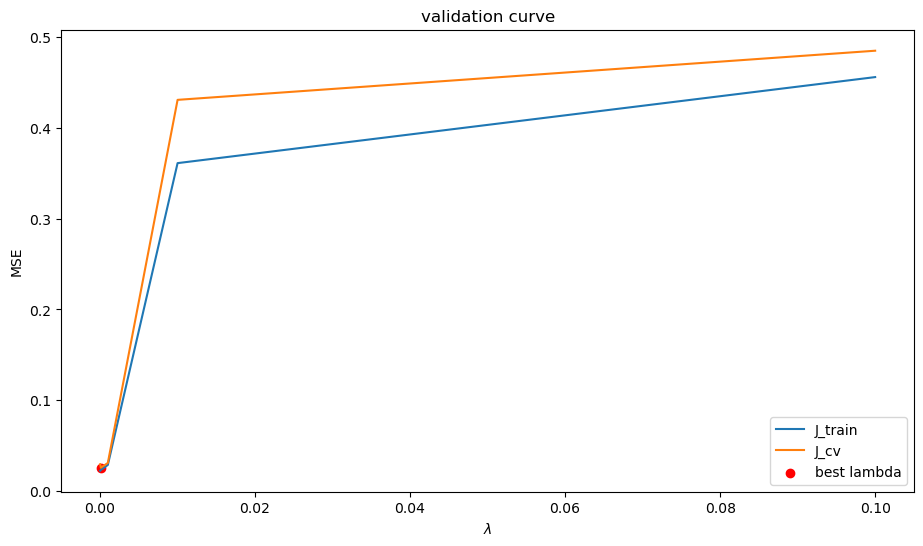

   lambda   |    J_train    |     J_cv
---------------------------------------------
   1e-05    |   0.0223664   |   0.0295182
---------------------------------------------
  0.0001    |   0.0232375   |   0.0257437
---------------------------------------------
   0.001    |   0.0287320   |   0.0309224
---------------------------------------------
    0.01    |   0.3612617   |   0.4309633
---------------------------------------------
     0.1    |   0.4560360   |   0.4850953
---------------------------------------------

For lambda = 0.0001, the least amount of the loss function is obtained.
Run Time : 1.650080136458079 min


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.python.keras import regularizers
from sklearn.metrics import mean_squared_error
from colorama import Fore

import time
start = time.time()

a1 = 500     #The data is repeated a1 times to speed up the code.
    
y_train = y_train.reshape(-1, 1)
print(f'X_train = {X_train.shape}  ,  y_train = {y_train.shape}  ,  X_cv = {X_cv.shape}')
# print(X_train.shape, y_train.shape, X_cv.shape)

print(f"\nX_train Max, Min pre normalization: {np.max(X_train[:,0]):0.2f}, {np.min(X_train[:,0]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
X_norm = norm_l(X_train)
print(f"X_train Max, Min post normalization: {np.max(X_norm[:,0]):0.2f}, {np.min(X_norm[:,0]):0.2f}")

Xt = np.tile(X_norm,(a1,1))
Yt= np.tile(y_train,(a1,1))
print(f"\nThe data is repeated {a1} times except for x_cv.\nX_train = {Xt.shape}  ,  y_train = {Yt.shape}  ,  X_cv = {X_cv.shape}")

# print(Xt.shape, Yt.shape)

print(f"\nX_cv Max, Min pre normalization: {np.max(X_cv[:,0]):0.2f}, {np.min(X_cv[:,0]):0.2f}")
X_norm_cv = norm_l(X_cv)
print(f"X_cv Max, Min post normalization: {np.max(X_norm_cv[:,0]):0.2f}, {np.min(X_norm_cv[:,0]):0.2f}")



alpha_values = np.array([0.00001, 0.0001, 0.001, 0.01, 0.1])

J_train = np.zeros(alpha_values.size)
J_cv = np.zeros(alpha_values.size)

for i in range(alpha_values.size):
    tf.keras.utils.set_random_seed(0)
    
    print(Fore.LIGHTRED_EX + f"\n{40*'-'} lambda = {alpha_values[i]} {40*'-'}\n" + Fore.BLACK)
    model = Sequential([
            tf.keras.Input(shape=(1,)),
            Dense(units=50, activation='relu',   kernel_regularizer=regularizers.L2(alpha_values[i])),
            Dense(units=50, activation='relu',   kernel_regularizer=regularizers.L2(alpha_values[i])),
            Dense(units= 1, activation='linear', kernel_regularizer=regularizers.L2(alpha_values[i]))])

    model.compile(loss = MeanSquaredError(),
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
              
    model.fit(Xt, Yt, epochs=10, batch_size=64, verbose=0)
    
    J_train[i] = mean_squared_error(Yt, model.predict(Xt))
    J_cv[i] = mean_squared_error(y_cv, model.predict(X_norm_cv))  

B = np.unravel_index(np.argmin(J_cv), J_cv.shape)
plt.figure(figsize=(11, 6))    
plt.plot(alpha_values, J_train, label='J_train')
plt.plot(alpha_values, J_cv, label='J_cv')
plt.scatter(alpha_values[B[0]], np.min(J_cv), label='best lambda', color ='r')
plt.xlabel('$ \lambda $')
plt.ylabel('MSE')
plt.title('validation curve')
plt.legend()
plt.show()

np.set_printoptions(suppress=True)
print('   lambda   |    J_train    |     J_cv')
print('-'*45)
np.set_printoptions(suppress=True)
for i in range(alpha_values.size):
    np.set_printoptions(suppress=True)
    print(f'{alpha_values[i]:8.6g}    |   {J_train[i]:0.7f}   |   {J_cv[i]:0.7f}')
    print('-'*45)
print(f'\nFor lambda = {alpha_values[B[0]]}, the least amount of the loss function is obtained.')

J_train2 = J_train
J_cv2 = J_cv

print(f"Run Time : {(time.time() - start)/60} min")

**3_2)**report the *generalization error*.

In [14]:
print(f"X_test Max, Min pre normalization: {np.max(X_test[:,0]):0.2f}, {np.min(X_test[:,0]):0.2f}")
X_norm_test = norm_l(X_test)
print(f"X_test Max, Min post normalization: {np.max(X_norm_test[:,0]):0.2f}, {np.min(X_norm_test[:,0]):0.2f}\n")

# best_lambda = alpha_values[B[0]]
best_lambda = 0.0001

model = Sequential([
            tf.keras.Input(shape=(1,)),
            Dense(units=50, activation='relu',   kernel_regularizer=regularizers.L2(best_lambda)),
            Dense(units=50, activation='relu',   kernel_regularizer=regularizers.L2(best_lambda)),
            Dense(units= 1, activation='linear', kernel_regularizer=regularizers.L2(best_lambda))])

model.compile(loss = MeanSquaredError(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

model.fit(Xt, Yt, epochs=10, batch_size=216, verbose=0)

y_test_pred = model.predict(X_norm_test)
generalization_error = mean_squared_error(y_test, y_test_pred)
print(f"generalization_error : {generalization_error:0.6f}")

X_test Max, Min pre normalization: 89.50, -87.00
X_test Max, Min post normalization: 1.73, -1.73

3/3 [==============================] - 0s 2ms/step
generalization_error : 0.027212


**3_3)** plot **learning curve** (`J_train` and `J_cv` vs `m =` training size) for the best choice.

X_train = (216, 1)  ,  y_train = (216, 1)  ,  X_cv = (72, 1)

The data is repeated 500 times except for x_cv.

---------------------------------------- m = 30 ----------------------------------------

3/3 [==============================] - 0s 1ms/step

---------------------------------------- m = 35 ----------------------------------------

3/3 [==============================] - 0s 1ms/step

---------------------------------------- m = 40 ----------------------------------------

3/3 [==============================] - 0s 1ms/step

---------------------------------------- m = 45 ----------------------------------------

3/3 [==============================] - 0s 1ms/step

---------------------------------------- m = 50 ----------------------------------------

3/3 [==============================] - 0s 2ms/step

---------------------------------------- m = 55 ----------------------------------------

3/3 [==============================] - 0s 1ms/step

-------------------------------------

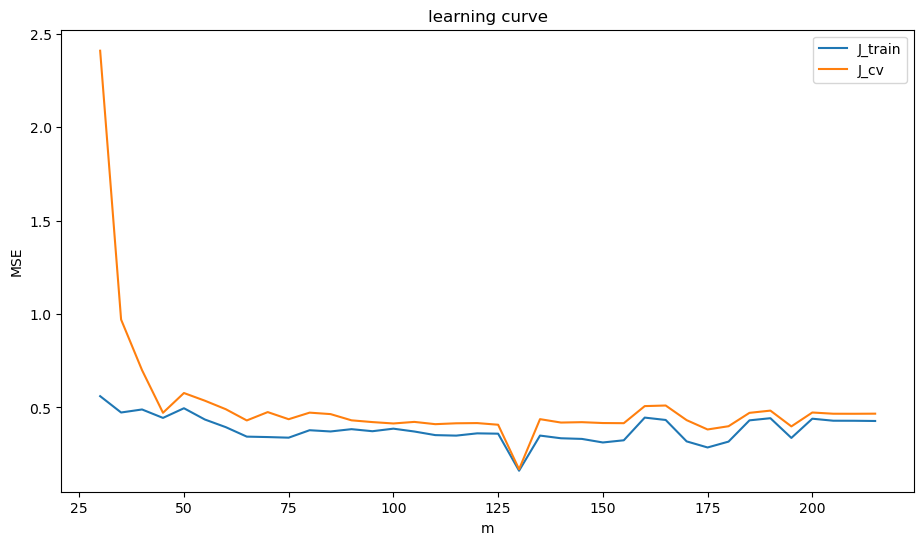

Run Time : 3.6549267093340556 min


In [16]:
from colorama import Fore
import time
start = time.time()

best_lambda = 0.0001
a2 = 500     #The data is repeated a1 times to speed up the code.
print(f'X_train = {X_train.shape}  ,  y_train = {y_train.shape}  ,  X_cv = {X_cv.shape}')

print(f"\nThe data is repeated {a2} times except for x_cv.")

list_m = np.arange(30, X_train.shape[0], 5)
J_train = np.zeros(list_m.size)
J_cv = np.zeros(list_m.size)

for i in range(list_m.size):
    tf.keras.utils.set_random_seed(0)
    
    m = list_m[i]
    print(Fore.LIGHTRED_EX + f"\n{40*'-'} m = {m} {40*'-'}\n" + Fore.BLACK)
    X_train_m = X_train[0:m , :]
    y_train_m = y_train[0:m]
    X_norm = norm_l(X_train_m)
    Xt = np.tile(X_norm,(a2,1))
    Yt = np.tile(y_train_m,(a2,1))
      
    model = Sequential([
            tf.keras.Input(shape=(1,)),
            Dense(units=50, activation='relu',   kernel_regularizer=regularizers.L2(best_lambda)),
            Dense(units=50, activation='relu',   kernel_regularizer=regularizers.L2(best_lambda)),
            Dense(units= 1, activation='linear', kernel_regularizer=regularizers.L2(best_lambda))])

    model.compile(loss = MeanSquaredError(),
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

    model.fit(Xt, Yt, epochs=10, batch_size=216, verbose=0)
    
    J_train[i] = mean_squared_error(Yt, model.predict(Xt))
    
    J_cv[i] = mean_squared_error(y_cv, model.predict(X_norm_cv))
    
plt.figure(figsize=(11, 6))    
plt.plot(list_m, J_train, label='J_train')
plt.plot(list_m, J_cv, label='J_cv')
plt.xlabel('m')
plt.ylabel('MSE')
plt.title('learning curve')
plt.legend()
plt.show()
print(f"Run Time : {(time.time() - start)/60} min")